In [7]:
import yfinance as yf
import yahoo_fin.stock_info as si
import pandas as pd
import numpy as np
import math
import datetime as dt
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [53]:
################# input ticker ###############
ticker = "jnj"
stock = yf.Ticker(ticker)

In [24]:
######################## financial report analysis ####################
unit = 'quart'

if unit == 'quart':
    fin = stock.quarterly_financials
    bs = stock.quarterly_balance_sheet
elif unit == 'year':
    fin = stock.financials
    bs = stock.balance_sheet

if(fin.shape[0] == 0):
    print('Invalid Ticker')
else:
    ## Ratio of totoal liab and total asset
    lia_ast = bs.loc['Total Liab', :]/bs.loc['Total Assets', :]

    ## Ratio of current totoal liab and current total asset
    lia_ast_cur = bs.loc['Total Current Liabilities', :]/bs.loc['Total Current Assets', :]
    
    ## cash/liab
    cash_lia_cur = bs.loc['Cash', :]/bs.loc['Total Current Liabilities', :]
    cash_lia = bs.loc['Cash', :]/bs.loc['Total Liab', :]
    
    ## (cash+short_term_invest)/laib
    if 'Short Term Investments' in bs.index:
        cain_lia_cur = (bs.loc['Cash', :] + bs.loc['Short Term Investments',:])/bs.loc['Total Current Liabilities', :]
        cain_lia = (bs.loc['Cash', :] + bs.loc['Short Term Investments',:])/bs.loc['Total Liab', :]
    else:
        cain_lia_cur = cash_lia_cur
        cain_lia = cash_lia 
    
    dfasset = [lia_ast_cur, lia_ast, cash_lia_cur, cash_lia, cain_lia_cur, cain_lia]
    asset_smry = pd.DataFrame(dfasset).T
    asset_smry.columns = ['Cur_Liab/Asset', 'Tot_Liab/Asset', 'Cur_Cash/Liab', 'Tot_Cash/Liab', 'Cur_C_STI/Liab', 'Tot_C_STI/Liab']
    
    ## gross
    rev_total = fin.loc['Total Revenue', :]
    rev_cost = fin.loc['Cost Of Revenue', :]
    gross_pchg = [round((rev_total[i]-rev_total[i+1])/rev_total[i+1]*100, 2) for i in range(len(rev_total)-1)]+[0]
    gross_pchg = pd.DataFrame(gross_pchg)
    gross_pchg.index = rev_total.index
  
    ## gross marging
    gmargin = (rev_total-rev_cost)/rev_total
    gmargin_pchg = [round((gmargin[i]-gmargin[i+1])/gmargin[i+1]*100, 2) for i in range(len(gmargin)-1)]+[0]
    gmargin_pchg = pd.DataFrame(gmargin_pchg)
    gmargin_pchg.index = gmargin.index
    
    gross_smry = pd.concat([rev_total, gross_pchg, gmargin, gmargin_pchg], axis = 1)
    gross_smry.columns = ['Gross', 'Gross_PCHG(%)', 'Gross_Margin', 'GM_PCHG(%)']
    
    ## net income
    ninc = fin.loc['Net Income', :]
    ninc_pchg_prev = [round((ninc[i] - ninc[i+1])/ninc[i+1]*100, 2) for i in range(len(ninc)-1)]+[0]
    ninc_pchg_prev = pd.DataFrame(ninc_pchg_prev)
    ninc_pchg_prev.index = ninc.index
    
    ninc_pchg = [round((ninc[i] - ninc[-1])/ninc[-1]*100, 2) for i in range(len(ninc))]
    ninc_pchg = pd.DataFrame(ninc_pchg)
    ninc_pchg.index = ninc.index
    
    ninc_smry = pd.concat([ninc, ninc_pchg_prev, ninc_pchg], axis = 1)
    ninc_smry.columns = ['Net Income', 'Net Income PCHG Prev(%)', 'Net Income PCHG(%)']
    
    ## return on equity
    roes = [round(fin.loc['Net Income', :][i]/bs.loc['Total Stockholder Equity', :][i]*100, 2) for i in range(len(fin.loc['Net Income', :]))]
    roes = pd.DataFrame(roes)
    roes.index = fin.loc['Net Income', :].index
    roes.columns = ['Return on Equity(%)']
    
    ## PB ratio 
    pb_ratio = stock.info['marketCap']/bs.loc['Net Tangible Assets', :][0]
    
    ## summaries
    print(round(asset_smry, 3))
    print(gross_smry)
    print(ninc_smry)
    print(roes)
    print('PB Ratio: '+str(round(pb_ratio, 3)))

            Cur_Liab/Asset  Tot_Liab/Asset  Cur_Cash/Liab  Tot_Cash/Liab  \
                                                                           
2021-12-31           0.622           0.801          0.726          0.154   
2021-09-30           0.656           0.818          0.802          0.190   
2021-06-30           0.433           0.810          1.370          0.276   
2021-03-31           0.459           0.822          1.286          0.269   

            Cur_C_STI/Liab  Tot_C_STI/Liab  
                                            
2021-12-31           0.762           0.162  
2021-09-30           0.839           0.199  
2021-06-30           1.413           0.285  
2021-03-31           1.330           0.279  
                   Gross  Gross_PCHG(%) Gross_Margin  GM_PCHG(%)
                                                                
2021-12-31  1539000000.0           0.85      0.68486       -7.68
2021-09-30  1526000000.0          -1.74     0.741809       -3.03
2021-06-30  1

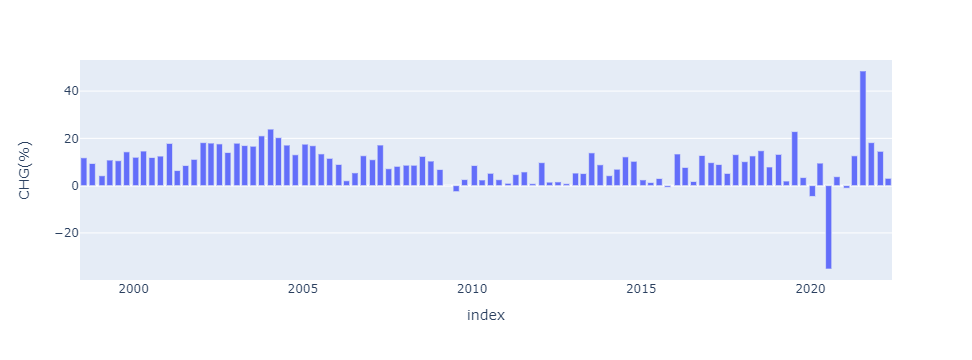

            Current Year EPS  Previous Year EPS  CHG(%)
2022-04-19              2.67               2.59    3.09
2022-01-25              2.13               1.86   14.52
2021-10-19              2.60               2.20   18.18
2021-07-21              2.48               1.67   48.50
2021-04-20              2.59               2.30   12.61
...                      ...                ...     ...
1999-07-20              0.42               0.38   10.53
1999-04-20              0.41               0.37   10.81
1999-01-26              0.25               0.24    4.17
1998-10-13              0.35               0.32    9.37
1998-07-14              0.38               0.34   11.76

[96 rows x 3 columns]


In [3]:
############### compare EPS with the previous year EPS ####################
earning_tmp1 = si.get_earnings_history(ticker)
earning_tmp2 = pd.DataFrame(earning_tmp1)
earnnona = earning_tmp2.dropna()
eps_act = np.array(earnnona['epsactual'])
eps_dat = earnnona['startdatetime']
eps_chg_pry = np.round((eps_act[:-4] - eps_act[4:])/eps_act[4:]*100, 2)
eps_smry = pd.DataFrame([eps_act[:-4],eps_act[4:], eps_chg_pry]).T
eps_smry.columns = ['Current Year EPS', 'Previous Year EPS', 'CHG(%)']
eps_smry.index = [dat[:10] for dat in eps_dat[:-4]]
eps_smry_sub = eps_smry.iloc[:, :]

# plot EPS change %
fig = px.bar(eps_smry_sub, x = eps_smry_sub.index, y = 'CHG(%)')
fig.show()

print(eps_smry_sub)

In [25]:
################ basic info #####################
variables = ['revenueGrowth', 'targetLowPrice', 'targetMedianPrice', \
'targetHighPrice', 'forwardPE', 'trailingPE', 'priceToBook', 'pegRatio', \
'quickRatio', 'shortRatio', 'payoutRatio', 'dividendYield', \
'enterpriseToRevenue', 'heldPercentInstitutions', 'beta', 'recommendationKey']

skinfo = stock.info
info = list(map(skinfo.get, variables))
basic_info = pd.DataFrame(info)
basic_info.index = variables
basic_info.columns = ['Value']
basic_info

Value
revenueGrowth                0.193
targetLowPrice                 345
targetMedianPrice              375
targetHighPrice              420.4
forwardPE                23.847242
trailingPE                27.89601
priceToBook               22.36998
pegRatio                      2.13
quickRatio                   1.451
shortRatio                     3.1
payoutRatio                 0.2105
dividendYield               0.0084
enterpriseToRevenue         10.948
heldPercentInstitutions    0.93672
beta                      1.207352
recommendationKey              buy

In [18]:
############## discount cash flow ############
unit = 'year'

if unit == 'quart':
    csh = stock.quarterly_cashflow
elif unit == 'year':
    csh = stock.cashflow
    
period = 15
fcsh = csh.loc['Total Cash From Operating Activities', :] + csh.loc['Capital Expenditures', :]
fcsh_chg = [(fcsh[i] - fcsh[i+1])/fcsh[i+1] for i in range(len(fcsh)-1)]
max_chg = np.max(fcsh_chg)
ave_chg = np.mean(fcsh_chg)
fcsh_ft = [fcsh[0]*(1+ave_chg)**n for n in range(period)]
csh_cur = np.sum([fcsh_ft[n-1]/(1+0.0177)**n for n in range(1, period+1)])/10**9
print(fcsh)
print(csh_cur)


2021-12-31   -2.024000e+09
2020-12-31   -1.104000e+09
2019-12-31   -1.170000e+08
2018-12-31    3.680000e+08
dtype: float64
-160942658.7718528


In [26]:
########### functions ############
## simple moving average
def fsma(price, days):
    smas = [np.mean(price[i:(i+days)]) for i in range(len(price)-days+1)]
    return smas

## exponential moving average
def fema(price, smooth, days):
    emas = [np.sum(price[:days])/days]
    for i in range(1, len(price[days:])):
        ema = price[i]*smooth/(1+days) + emas[i-1]*(1 - smooth/(1+days))
        emas.append(ema)
    return emas

## relative strength index
def frsi(price, days):
    gainloss = [(price[i+1] - price[i])/price[i] for i in range(len(price)-1)]
    gain_ave1 = sum([gl for gl in gainloss[:days] if gl >= 0])/days
    loss_ave1 = sum([gl for gl in gainloss[:days] if gl < 0])/days
    gain_aves = [gain_ave1]
    loss_aves = [loss_ave1]

    gainloss_rsi = gainloss[14:]
    for i in range(1, len(gainloss_rsi)):

        if gainloss_rsi[i] >= 0:
            cg = gainloss_rsi[i]
            cl = 0
        elif gainloss_rsi[i] < 0:
            cg = 0
            cl = gainloss_rsi[i]

        gain_ave = (gain_aves[i-1]*(days-1) + cg)/days
        gain_aves.append(gain_ave)

        loss_ave = (loss_aves[i-1]*(days-1) + cl)/days
        loss_aves.append(loss_ave)

    rs_s = np.absolute(np.array(gain_aves)/np.array(loss_aves))
    rsis = 100 - 100/(1 + rs_s)
    return rsis

## money flow index
def fmfi(price, volumes, days):
    pos_marks = []
    neg_marks = []
    for i in range(1, len(price)):
        if price[i] >= price[i-1]:
            pos_mark = 1
            neg_mark = 0
        else:
            pos_mark = 0
            neg_mark = 1

        pos_marks.append(pos_mark)
        neg_marks.append(neg_mark)

    price_mfi = price[1:]
    volumes_mfi = volumes[1:]
    mfis = np.zeros(len(price_mfi)-days+1)
    for i in range(len(price_mfi)-days+1):
        pos_mf = np.sum(price_mfi[i:(i+days)]*volumes_mfi[i:(i+days)]*pos_marks[i:(i+days)])
        neg_mf = np.sum(price_mfi[i:(i+days)]*volumes_mfi[i:(i+days)]*neg_marks[i:(i+days)])
        mfr = pos_mf/neg_mf
        mfis[i] = 100 - 100/(1+mfr)
    return mfis


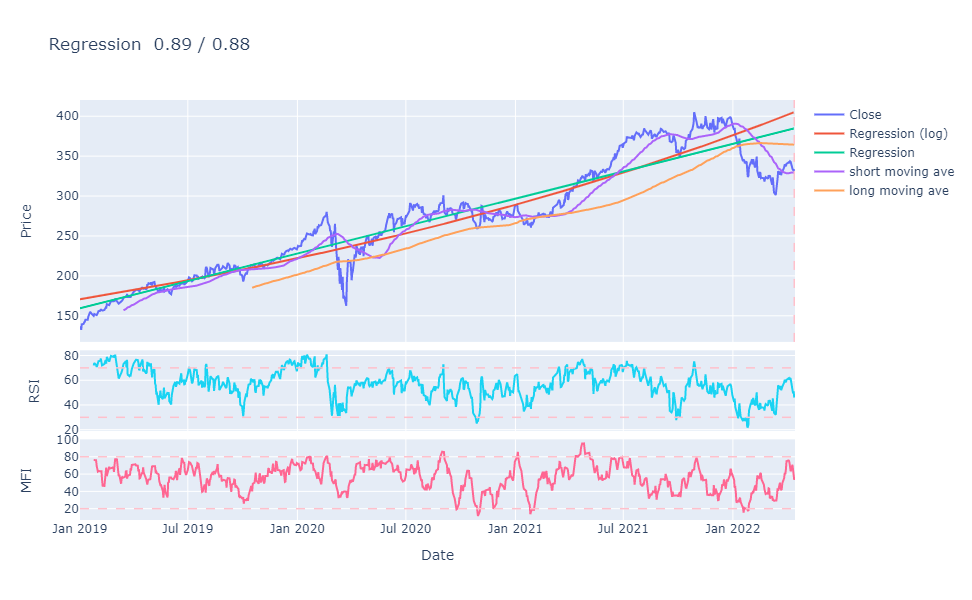

In [27]:
############### price range ####################
tdy = dt.datetime.today()
stdate = '2019-01-01'
eddate_tr = tdy
eddate_te = tdy

ma_type = 'sma'
preddays = 0  # future for prediction
mapd = (50, 200)  # (short, long) moving average period

# stock prices
stock = yf.Ticker(ticker)
skhist_tr = stock.history(start = stdate, end = eddate_tr).dropna()
skhist_te = stock.history(start = stdate, end = eddate_te).dropna()
skhigh_tr = skhist_tr['High']
sklow_tr = skhist_tr['Low']
skclose_tr = skhist_tr['Close']
skhigh_te = skhist_te['High']
sklow_te = skhist_te['Low']
skclose_te = skhist_te['Close']
sktyp_te = (skhigh_te + sklow_te + skclose_te)/3
skgl_te = [(skclose_te[i+1] - skclose_te[i])/skclose_te[i] for i in range(len(skclose_te)-1)]
skvol_te = skhist_te['Volume']

# dates
dates_tr = skhist_tr.index
dates_te = skhist_te.index

# moving average
if ma_type == 'sma':
    mashort = fsma(price = skclose_te, days = mapd[0])
    malong = fsma(price = skclose_te, days = mapd[1])

elif ma_type == 'ema':
    mashort = fema(price = skclose_te, smooth = 2, days = mapd[0])
    malong = fema(price = skclose_te, smooth = 2, days = mapd[1])

# create index for regression
time_tr = np.array((dates_tr - dates_tr[0])/np.timedelta64(1, 'D')).reshape(-1, 1)
time_te = np.array((dates_te - dates_te[0])/np.timedelta64(1, 'D')).reshape(-1, 1)
pred_tm = np.array(range(int(time_te[-1])+1, int(time_te[-1])+preddays)).reshape(-1, 1)
time_pred = np.concatenate((time_te, pred_tm))

# prediction and moving ave time for plot
tm_pred = [dt.date.fromisoformat(stdate) + dt.timedelta(days = int(time_pred[i])) for i in range(len(time_pred))]

# time for short and long moving average
tm_mas = dates_te[mapd[0]:]
tm_mal = dates_te[mapd[1]:]

## regression on log(price)
reg_close_log = LinearRegression().fit(time_tr, np.log(skclose_tr))
close_score1 = np.round(reg_close_log.score(time_tr, np.log(skclose_tr)), 2)
pred_close1 = np.exp(reg_close_log.predict(time_pred))

## regression on price
reg_close = LinearRegression().fit(time_tr, skclose_tr)
close_score2 = np.round(reg_close.score(time_tr, skclose_tr), 2)
pred_close2 = reg_close.predict(time_pred)

## relative strength index
rsi = frsi(price = skclose_te, days = 14)

## money flow index
mfi = fmfi(price = sktyp_te, volumes = skvol_te, days = 14)

## plots
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.02, row_heights = [0.6, 0.2, 0.2])

fig.add_trace(go.Scatter(x = dates_te, y = skclose_te, name = 'Close'), row=1, col=1)
fig.add_trace(go.Scatter(x = tm_pred, y = pred_close1, name = 'Regression (log)'), row=1, col=1)
fig.add_trace(go.Scatter(x = tm_pred, y = pred_close2, name = 'Regression'), row=1, col=1)
fig.add_trace(go.Scatter(x = tm_mas, y = mashort, name = 'short moving ave'), row=1, col=1)
fig.add_trace(go.Scatter(x = tm_mal, y = malong, name = 'long moving ave'),row=1, col=1)
fig.add_vline(x = dates_tr[-1], line_width = 1.5, line_dash = 'dash', line_color = 'pink', row=1, col=1)

fig.add_trace(go.Scatter(x = dates_te[15:], y = rsi, showlegend = False), row = 2, col = 1)
fig.add_hline(y = 30, line_width = 1.5, line_dash = 'dash', line_color = 'pink', row=2, col=1)
fig.add_hline(y = 70, line_width = 1.5, line_dash = 'dash', line_color = 'pink', row=2, col=1)

fig.add_trace(go.Scatter(x = dates_te[15:], y = mfi, showlegend = False), row = 3, col = 1)
fig.add_hline(y = 20, line_width = 1.5, line_dash = 'dash', line_color = 'pink', row=3, col=1)
fig.add_hline(y = 80, line_width = 1.5, line_dash = 'dash', line_color = 'pink', row=3, col=1)

fig['layout']['xaxis3']['title'] = 'Date'
fig['layout']['yaxis']['title']='Price'
fig['layout']['yaxis2']['title']='RSI'
fig['layout']['yaxis3']['title']='MFI'
fig.update_layout(title='Regression  '+str(close_score1)+' / '+str(close_score2), width = 950, height = 600)
fig.show()

In [28]:
### RSI, MFI, Disparity analysis
# disparity
disp_short = (skclose_te[49:]/np.array(mashort)-1)*100
disp_long = (skclose_te[199:]/np.array(malong)-1)*100

####### analysis for RSI and MFI
def pctg_cut(ind, thd1, thd2):
    frac = np.mean((ind >= thd1)*(ind < thd2))
    pct = np.round(frac*100, 2)
    return pct

q_rsi = 0.05
q_mfi = 0.05
q_disp = 0.05
rsi_CrI = np.round(np.quantile(rsi, [q_rsi, 1-q_rsi]), 1)
mfi_CrI = np.round(np.quantile(mfi, [q_mfi, 1-q_mfi]), 1)
disp_CrI_s = np.round(np.quantile(disp_short, [q_disp, 1-q_disp]), 1)
disp_CrI_l = np.round(np.quantile(disp_long, [q_disp, 1-q_disp]), 1)

print('current RSI: ' + str(round(rsi[-1], 1)))
print(str(int((1-2*q_rsi)*100))+'%'+' CrI of RSI:', rsi_CrI)
print('current MFI: ' + str(round(mfi[-1], 1)))
print(str(int((1-2*q_mfi)*100))+'%'' CrI of MFI:', mfi_CrI)
print('current disparity (%): ' + str(round(disp_short[-1], 1)) + '(short), ' + str(round(disp_long[-1], 1)) + '(long)')
print(str(int((1-2*q_disp)*100))+'%'' CrI of Disparity (short):', disp_CrI_s, '%')
print(str(int((1-2*q_disp)*100))+'%'' CrI of Disparity (long):', disp_CrI_l, '%')

current RSI: 46.0
90% CrI of RSI: [35.5 75.4]
current MFI: 47.9
90% CrI of MFI: [29.4 78.3]
current disparity (%): -0.0(short), -9.7(long)
90% CrI of Disparity (short): [-9.4 10.3] %
90% CrI of Disparity (long): [-10.9  24. ] %


In [80]:
##################### historical PE ratio #####################
## eps
ticker = 'cost'
stock = yf.Ticker(ticker)
earning_tmp1 = si.get_earnings_history(ticker)
earning_tmp2 = pd.DataFrame(earning_tmp1)
earning = earning_tmp2[earning_tmp2['epsestimate'].notna()]

# actual earning
earn_act = earning.dropna()

# actual eps date
earntime = earn_act['startdatetime'].str[:10]

# actual eps
eps_act = earn_act['epsactual']
eps_est = earning['epsestimate']

# actual ttm eps
eps_ttms = pd.DataFrame([np.sum(eps_act[i:(i+4)]) for i in range(0, len(eps_act)-3)])
eps_date = earntime[0:-3].reset_index(drop = True)
epsttm = pd.concat([eps_date, eps_ttms], axis = 1, ignore_index=True).iloc[::-1]
epsttm.columns = ['Date', 'epsttm']

# close prices
tdy = dt.datetime.today()
skprice = stock.history(start = earntime[0:-3].iloc[-1], end = tdy)
skclose = skprice['Close'].reset_index()

# merge close price and eps
skclose['Date'] = skclose.Date.astype('datetime64[ns]')
epsttm['Date'] = epsttm.Date.astype('datetime64[ns]')
smry_per = skclose.merge(epsttm, how = 'left', on = 'Date')

# replace nan with its corresponding eps
lepsttm = list(smry_per['epsttm'])
for i in range(1, len(lepsttm)):
    if math.isnan(lepsttm[i]):
        lepsttm[i] = lepsttm[i-1]
    else: 
        continue
smry_per['epsttm'] = lepsttm

# pe ratios
smry_per['PER'] = smry_per['Close'] / smry_per['epsttm']

In [81]:
# summary (median per in the past five years, est. buy price)
skinfo = stock.info
trper = skinfo['trailingPE']

ny = 3  # number of years
med_per = np.median(smry_per['PER'].iloc[-253*ny:])
q13 = np.quantile(smry_per['PER'].iloc[-253*ny:], [0.25, 0.75])
estprice_act = float(eps_ttms.iloc[0])*med_per
estprice_est = (eps_est.iloc[0]+np.sum(eps_act.iloc[:3]))*med_per

#crt_ratio = trper/smry_per['PER'].iloc[-1]  # correction ratio

print('actual eps(TTM)', float(eps_ttms.iloc[0]))
print('PER(TTM, YH): ', trper)
print('PER(TTM, CS): ', round(smry_per['PER'].iloc[-1], 2))
print('median, Q1, Q3:', np.round(med_per, 2), np.round(q13, 2))
print('est. price (actual eps):', round(estprice_act, 2))
print('est. price (est. eps):', round(estprice_est, 2))

actual eps(TTM) 12.55
PER(TTM, YH):  48.632557
PER(TTM, CS):  48.09
median, Q1, Q3: 37.74 [34.7  41.42]
est. price (actual eps): 473.63
est. price (est. eps): 473.25


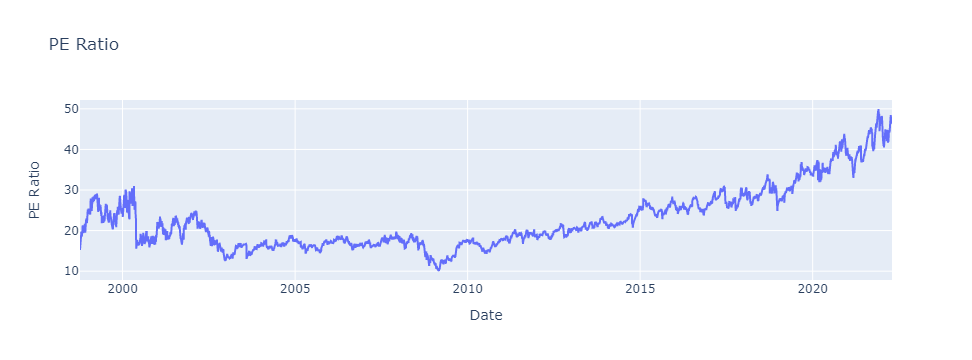

In [82]:
# plots
fig1 = go.Figure(data = go.Scatter(x = smry_per['Date'], y = smry_per['PER'], name = 'PER'))
fig1.update_layout(title='PE Ratio', xaxis_title='Date', yaxis_title='PE Ratio')
fig1.show()

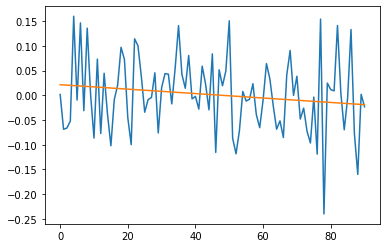

In [38]:
##### plot growth of per
perg = np.array([(pers[i]-pers[i+1])/pers[i+1] for i in range(len(pers)-1)]).reshape(-1, 1)
indeces = np.array(range(len(perg))).reshape(-1, 1)
fit_perg = LinearRegression().fit(indeces, perg)
perg_pred = fit_perg.predict(indeces)
plt.plot(perg)
plt.plot(perg_pred)
plt.show()

In [41]:
# compared with SP500 and NASDAQ100
ticker = 'mco'
periods = ['1mo', '3mo', '6mo', '1y', '2y', '5y']

def skprcchg(tk, prd):
    stock = yf.Tickers(tk+' voo qqq')
    skclose = stock.history(period = prd)['Close'].dropna()
    skchg_tmp = round((skclose.iloc[-1, :] - skclose.iloc[0, :])/skclose.iloc[0, :]*100, 2)
    skchg = pd.DataFrame(skchg_tmp).T
    return skchg

skchgs = None
for prd in periods:
    chg = skprcchg(ticker, prd)
    skchgs = pd.concat([skchgs, chg])
    
skchgs.index = periods
skchgs = skchgs[[ticker.upper(), 'VOO', 'QQQ']]
print('Stock Price CHG(%)')
skchgs

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
Stock Price CHG(%)


MCO     VOO     QQQ
1mo    9.23    7.79    8.01
3mo   -4.99   -3.62   -8.12
6mo   -4.96    2.87   -3.17
1y    10.36   10.98    4.60
2y    53.83   68.28   75.59
5y   218.51  108.07  173.71

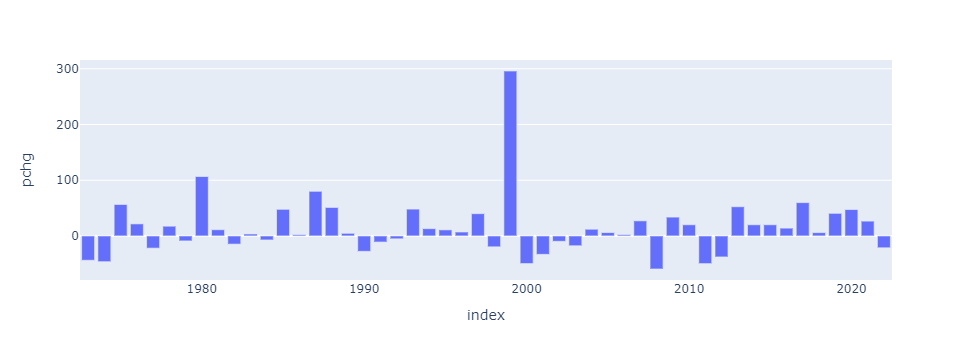

In [17]:
##### change % by year (sp500: ^GSPC, nasdaq: ^IXIC,  vix: ^VIX, Dow Jones: ^DJI)
stock = yf.Ticker('sony')
sk = stock.history(period = 'max')
pchgs = []
for yr in np.unique(sk.index.year):
    sk1y = sk[sk.index.year == yr]['Close']
    pchg = (sk1y[-1]/sk1y[0] - 1)*100
    pchgs.append(pchg)
    
skchg = pd.DataFrame(data = pchgs, index = np.unique(sk.index.year), columns = ['pchg'])

# plot change %
fig = px.bar(skchg, x = skchg.index, y = 'pchg')
fig.show()

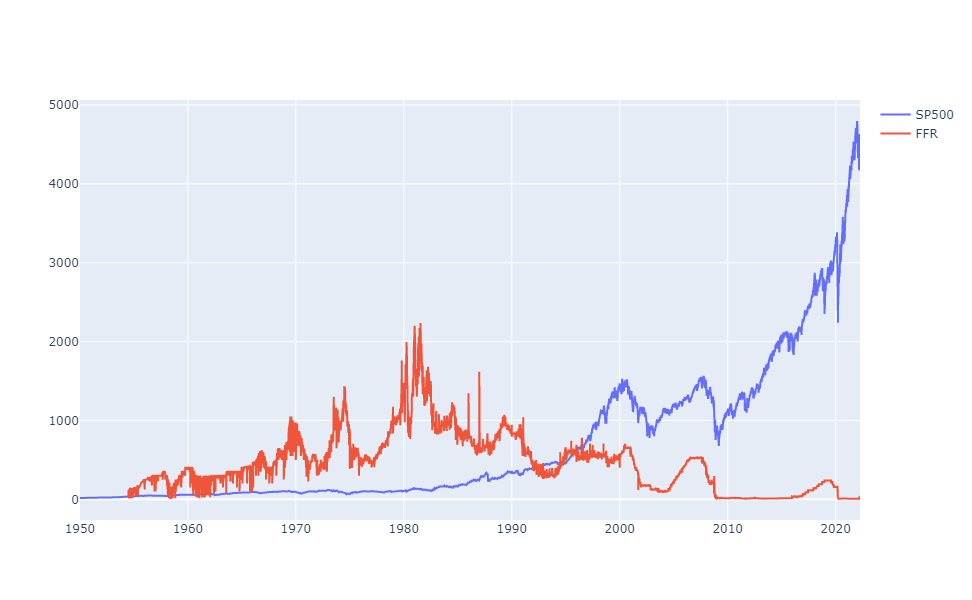

In [18]:
# Federal Funds rate
stock = yf.Ticker('^GSPC')
sp = stock.history(period = 'max')
ffr = pd.read_excel("C:\\Users\\henry\\OneDrive\\fed_funds_rate.xlsx").dropna()

fig = go.Figure()
fig.add_trace(go.Scatter(x = sp.index, y = sp['Close'], name = 'SP500'))
fig.add_trace(go.Scatter(x = ffr['Date'], y = ffr['FFR']*100, name = 'FFR'))
fig.update_layout(width = 950, height = 600)
fig.show()

In [79]:
skinfo = stock.info
skinfo

{'zip': '60606-1596',
 'sector': 'Industrials',
 'fullTimeEmployees': 142000,
 'longBusinessSummary': 'The Boeing Company, together with its subsidiaries, designs, develops, manufactures, sales, services, and supports commercial jetliners, military aircraft, satellites, missile defense, human space flight and launch systems, and services worldwide. The company operates through four segments: Commercial Airplanes; Defense, Space & Security; Global Services; and Boeing Capital. The Commercial Airplanes segment provides commercial jet aircraft for passenger and cargo requirements, as well as fleet support services. The Defense, Space & Security segment engages in the research, development, production, and modification of manned and unmanned military aircraft and weapons systems; strategic defense and intelligence systems, which include strategic missile and defense systems, command, control, communications, computers, intelligence, surveillance and reconnaissance, cyber and information so